<div style="text-align: center;">
<h2>INFSCI 2915 Foundations- Machine Learning - Spring 2018 </h2>
<h1 style="font-size: 250%;">Assignment #1</h1>
<h3>Issued Tuesday, 2/06/2018; Due Tuesday, 11:59pm, 2/13/2018</h3>
<h3>Total points: 100 </h3>
</div>

In [155]:
# Type in your information in the double quotes
firstName = ""
lastName = ""
pittID = ""

In [1]:
#Libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import Image
import statsmodels.formula.api as smf
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/Users/meir/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


---

<h3>  Problem #1. K-nearest neighbors  [20 points] </h3> 

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

|Obs.|X1|X2|X3|Y
|--|-------------------------------|
|1 |0|3|0|Green|
|2 |2|0|0|Green|
|3|0|1|3|Green|
|4|0|1|2|Red|
|5|-1|0|1|Red|
|6|1|1|1|Green|

<b>Problem #1-1.</b> Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0

In [2]:
# Answer code 
# here is all data 
all_points = np.array([[0,3,0],[2,0,0],[0,1,3],[0,1,2],[-1,0,1],[1,1,1]])
test_point = np.array([[0,0,0]])
data = np.concatenate((all_points, test_point), axis=0)
# here colomn names for data frame 
names = np.array(['Obs.1','Obs.2','Obs.3','Obs.4','Obs.5','Obs.6','T_Point'])
# creating empty 2d array 
array = [[0 for x in range(len(data))] for y in range(len(data))] 
#### Calculating Euclidean distance
i = 0
while i < len(data)-1:  
    j = 1
    while j < len(data):      
        dist = (((data[i][0]-data[j][0])**2)+ ((data[i][1]-data[j][1])**2)+((data[i][2]-data[j][2])**2))**(.5)
        array[i][j] = dist
        j= j+1  
    i = i+1    
### Creating symemtical matrix
for i in range(len(data)):
    for j in range(i, len(data)):
        array[j][i] = array[i][j]
# printing
print("                        Euclidean distance table:")
print (pd.DataFrame(array,columns=names, index=names)  )


                        Euclidean distance table:
            Obs.1     Obs.2     Obs.3     Obs.4     Obs.5     Obs.6   T_Point
Obs.1    0.000000  3.605551  3.605551  2.828427  3.316625  2.449490  3.000000
Obs.2    3.605551  0.000000  3.741657  3.000000  3.162278  1.732051  2.000000
Obs.3    3.605551  3.741657  0.000000  1.000000  2.449490  2.236068  3.162278
Obs.4    2.828427  3.000000  1.000000  0.000000  1.732051  1.414214  2.236068
Obs.5    3.316625  3.162278  2.449490  1.732051  0.000000  2.236068  1.414214
Obs.6    2.449490  1.732051  2.236068  1.414214  2.236068  0.000000  1.732051
T_Point  3.000000  2.000000  3.162278  2.236068  1.414214  1.732051  0.000000


=========================================================================================================================

<b>Problem #1-2.</b> What is our prediction with K = 1? and explain why.

In [3]:
#Answer code
from sklearn.neighbors import KNeighborsClassifier
Y =  np.array([0,0,0,1,1,0]) # Where 0 represents Green color and 1 represents Red color. 
all_points = np.array([[0,3,0],[2,0,0],[0,1,3],[0,1,2],[-1,0,1],[1,1,1]])
test_point = np.array([[0,0,0]])
def printcolor(x,k):
    print ("When k is equal to %d, prediction for Y when X1 = X2 = X3 = 0 is:" %k ) 
    if x == [0]:
        print ("Green")
    elif x == [1]:
        print ("Red")
    else:
        print ("Something went wrong sorry.....")
k = 1
knn=KNeighborsClassifier(n_neighbors= k)  
knn.fit(all_points,Y)
predict = knn.predict(test_point)
print ("Using KNeighborsClassifier")
printcolor(predict,k)
print ("==========================================================================")
print ("Using Euclidean distance table")
df = pd.DataFrame(np.vstack((np.delete(pd.DataFrame(array,columns=names, index=names)["T_Point"].values, 6, 0),Y)).T,columns= ["Distance","Y" ] )
#predict = df["Distance"].min()
Small = df.nsmallest(1, 'Distance')
Y = Small['Y'].values
printcolor(Y,k)

Using KNeighborsClassifier
When k is equal to 1, prediction for Y when X1 = X2 = X3 = 0 is:
Red
Using Euclidean distance table
When k is equal to 1, prediction for Y when X1 = X2 = X3 = 0 is:
Red


=========================================================================================================================

<b>Problem #1-3.</b> What is our prediction with K = 3? and explain why.

In [158]:
# Answer code 
k = 3
Y =  np.array([0,0,0,1,1,0])
knn=KNeighborsClassifier(n_neighbors= k)  
knn.fit(all_points,Y)
predict = knn.predict(test_point)
print ("Using KNeighborsClassifier")
printcolor(predict,k)
print ("==========================================================================")
print ("Using Euclidean distance table")
from scipy import stats
Y= np.array(stats.mode(df.nsmallest(3, 'Distance')['Y'].values))[0]
printcolor(Y,k)

Using KNeighborsClassifier
When k is equal to 3, prediction for Y when X1 = X2 = X3 = 0 is:
Green
Using Euclidean distance table
When k is equal to 3, prediction for Y when X1 = X2 = X3 = 0 is:
Green


=========================================================================================================================

<b>Problem #1-4.</b>  How using a different number of K has an impact on the performance? explain.

<h3>Answer:   </h3> <br>
**In the KNN model: **
- A low number of K tends to overfit => High variance, low bias.
- A high number of K tends to underfit => High bias and low variance. 

=========================================================================================================================<br>=========================================================================================================================

<h3>  Problem #2. Answer those questions about linear regression [30 points] </h3>  
- Writing a code is not required for this question<br>
- Feel free to select any type of submission you are comfortable with (Since it may require some mathematical formula and symbols; MS Word, or scanned version of your writing will be fine) 

<b>Problem #2-1.</b> Find the least squared fit of a linear regression model using the following traning data

|Smoke index(x)|Lung cancer mortality index(y)|
|:--:|:-------------------------------:|
|127|115|
|121|128|
|94|128|
|126|156|
|102|101|
|111|128|
|95|115|
|89|105|
|101|87|

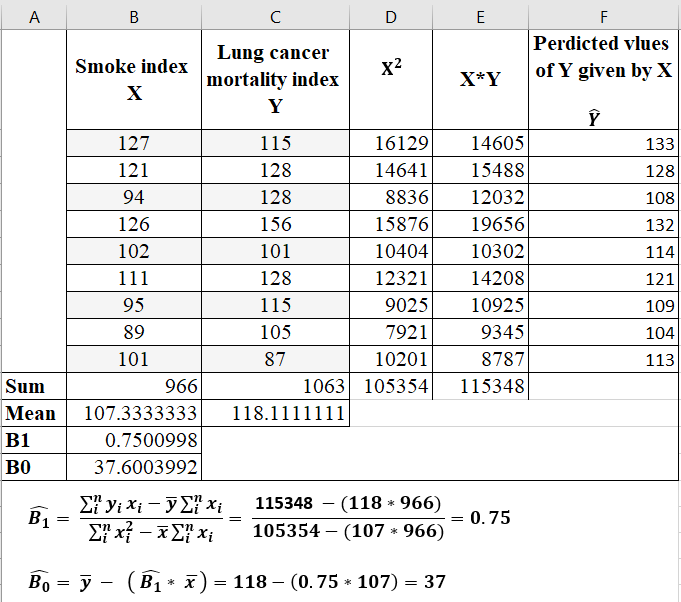

In [6]:
#Write your answer # Coding is not required
Image(filename='image1.png')

========================================================================================================================

<b>Problem #2-2.</b> Given the test data below, compute the R-squared metric of the fitted model

|Xi|Yi|
|:--:|:-------------------------------:|
|90|103|
|106|131|
|105|85|
|115|99|
|113|144|

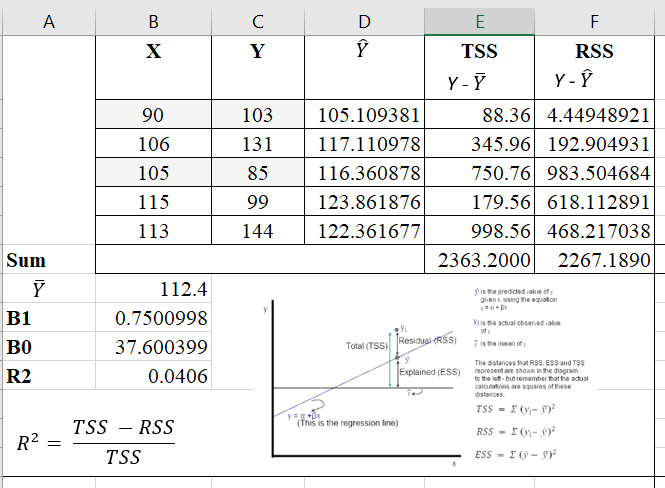

In [127]:
Image(filename='image3.png')

======================================================================================================================= <br>=======================================================================================================================

<h3>  Problem #3. This question involves the use of multiple linear regression on the Boston dataset [30 points]</h3> <br>
In this part, you should download and analyze **"Boston House Prices"** dataset. <br>
Here use a code below to download the  dataset: 

In [14]:
dataset = load_boston()
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


<b>Problem #3-1</b> Print the description of the dataset. 

<b> Answer the following question:</b> 

- Whole dataset contains 14 attributes, (13 numeric/categorical predictive and 1 target value)  what is a abbreviation of the target value? 

In [15]:
#Code
print(dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

<h3>Answer:   </h3> <br>
<b> Abbreviation of the target value is :
- MEDV => Median value of owner-occupied homes in $1000's
  
 </b>

=======================================================================================================================

<b>Problem #3-2 </b> Generate descriptive statistics using DataFrame. (hint: use "DataFrame . describe" function)<br>

Follow two steps to answer questions.
- Create a DataFrame usnig "data" from the dataset with columns using "feature_names".
- Generate descriptive statistics 

<b> Answer the following questions:</b> 

-  Which feature has the highest range (minimum and maximum value)?

-  Which feature has the lowest mean?  

-  Which feature has a lowest standard deviation? 

In [16]:
#Code
DataFrame = pd.DataFrame(dataset.data, columns= dataset.feature_names)
DataFrame.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


<h3>Answer:   </h3> <br>
<b> 
Which feature has the highest range (minimum and maximum value)?

- Feature *TAX* (full-value property-tax rate per $10,000) has the highest range(187 and 711)

Which feature has the lowest mean?

- Feature *CHAS* (Charles River dummy variable) has the lowest mean (0.069170)

Which feature has a lowest standard deviation?

 - Feature *NOX* (nitric oxides concentration) has a lowest standard deviation (0.115878)

 </b>

=======================================================================================================================

<b>Problem #3-3 </b> Feature Scaling

<b> Answer the following questions:</b> 

- From the information above, Do you recommend **feature scaling** to improve performance? Explain.  

- What is a difference between MinMaxScaler and StandardScaler? 

<h3>Answer:   </h3> <br>
<b> 

- Yes, I recommend feature scaling to improve performance because the range in each feature are unevenly distributed. 

- MinMaxScaler scales a feature to the range of 0 to 1. 

- StandardScaler standardizes the features with zero mean and unit variance.
</b> 

=======================================================================================================================

<b>Problem #3-4 </b> Calculate and report **correlations** between features and the target 

<b> Answer the following questions:</b> 

- What is a difference between positive and negative numbers on the correlation table? Explain.
- What is the lowest number in the table? Do you think it is the most or the least helpful features in predicting the
target class? Explain.

In [17]:
df = (pd.DataFrame(dataset.data, columns= dataset.feature_names))
df['target'] = dataset.target
corr = df.corr()
print (corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 

<h3>Answer:   </h3> <br>
<b> 
- A negative number means that features are negatively correlated; if one variable increases,  the other variable decreases. A positive number means positive correlation;  If one variable increases second variable increase as well.

- The lowest number in the table is the correlation between NOX and DIS which is -0.76923. They are negatively correlated.
They might be one of the most or the least helpful features in predicting the target.
</b>

=======================================================================================================================

<b>Problem #3-5 </b> 
Follow two steps to answer questions.

- Add 1 more column (dataset.target) to your DataFrame (give a name).

- Find the correlation matrix that shows the correlation between each pair of features. <br>

- Plot a correlation matrix<br> You can use the code below or write your own code to plot a correlation matrix *(extra point for writing your own code)* 

 <b>Answer the following questions:</b> 

- What is the correlation between the feature RM and the LSTAT? 
- What does this value of correlation indicate?
- Can you detect most or the least helpful features in predicting the target class from correlation matrix or from plot? How?

<IPython.core.display.Javascript object>


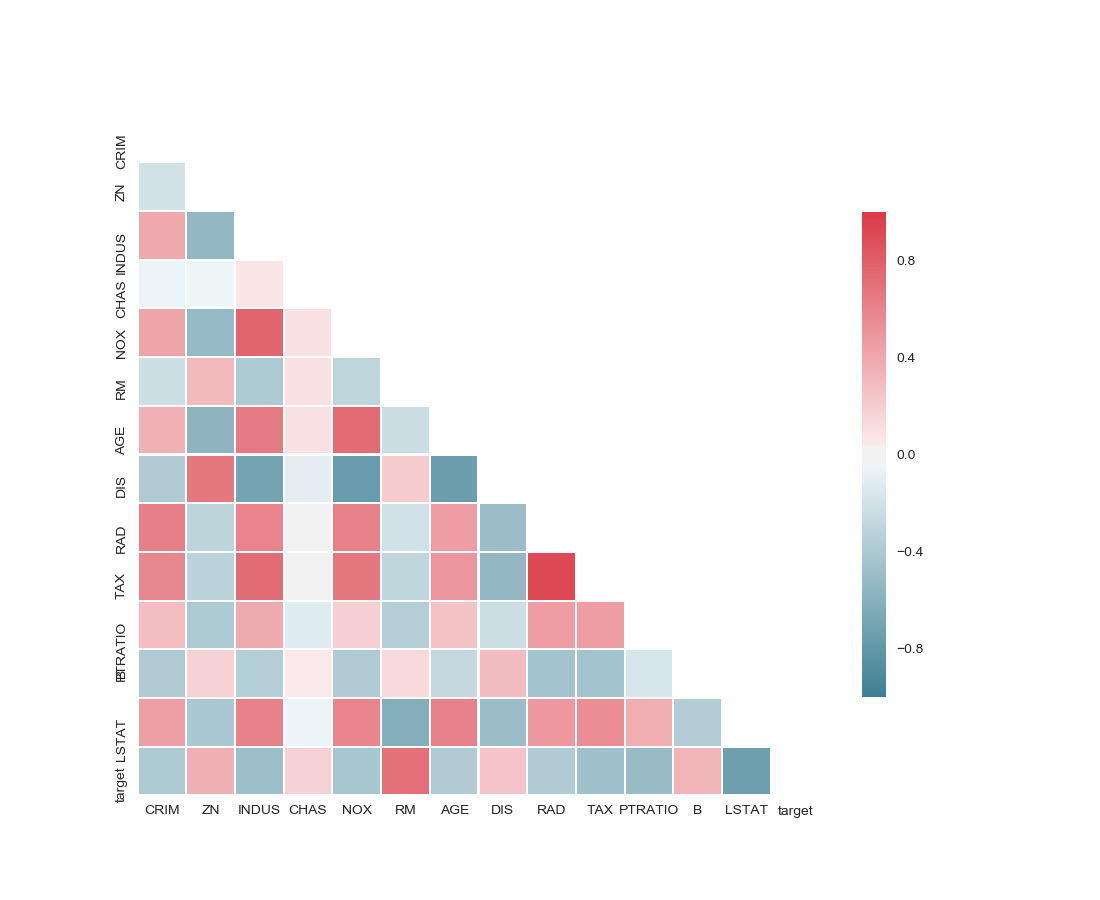

In [18]:
%matplotlib notebook
dataset = load_boston()
sns.set(style="white")
# Get correlation matrix
df = (pd.DataFrame(dataset.data, columns= dataset.feature_names))
df['target'] = dataset.target
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.9, cbar_kws={"shrink": .7})

<h3>Answer:   </h3> <br>
<b> 

- The correlation between the feature RM and the LSTAT is -0.613808

- This value indicates a high negative correlation between the feature RM and the LSTAT. 

- The most important features are those value close to 1 or -1.  Least important values are the values close to 0 

=======================================================================================================================

<b>Problem #3-6 </b> Scatter plot. <br> 

Follow three steps to answer questions <br> 
- Plot LSTAT versus target variable 
- Plot RM versus target variable 
- Plot CHAS versus target variable <br> 

<b> Answer the following questions:</b> 
- Is the relationship linear?
- Which looks the most nonlinear? Explain your chouce


**Plot LSTAT versus target variable**

<IPython.core.display.Javascript object>


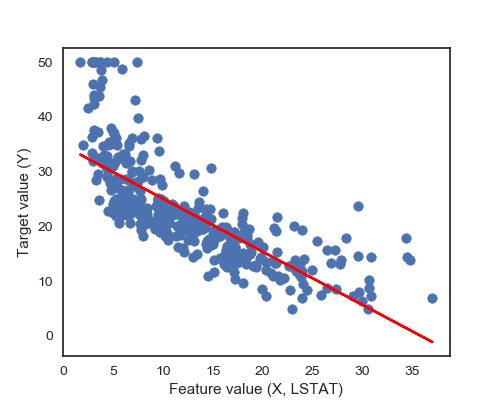

In [19]:
%matplotlib notebook
Y = dataset.target
X = dataset.data[:,[12]]
X_train, X_test, Y_train, Y_test= train_test_split(X, Y,random_state= 0)
lr = LinearRegression().fit(X_train,  Y_train)
estimated_linearmodel=	lr.intercept_ + lr.coef_ * X_train 
plt.figure(figsize=(5,4))
plt.scatter(X_train, Y_train, marker= 'o')
plt.plot(X_train, estimated_linearmodel, 'r-')
plt.xlabel('Feature value (X, LSTAT)'); plt.ylabel('Target value (Y)')
plt.show()

**Plot RM versus target variable**

<IPython.core.display.Javascript object>


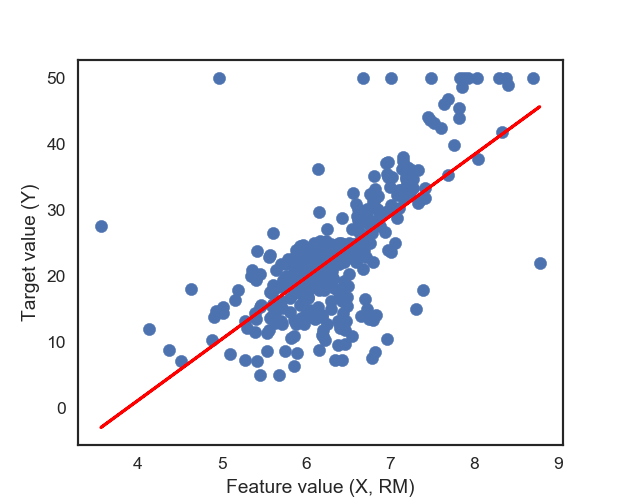

In [99]:
Y = dataset.target
X = dataset.data[:,[5]]
X_train, X_test, Y_train, Y_test= train_test_split(X, Y,random_state= 0)
lr = LinearRegression().fit(X_train,  Y_train)
estimated_linearmodel=	lr.intercept_ + lr.coef_ * X_train 
plt.figure(figsize=(5,4))
plt.scatter(X_train, Y_train, marker= 'o')
plt.plot(X_train, estimated_linearmodel, 'r-')
plt.xlabel('Feature value (X, RM)'); plt.ylabel('Target value (Y)')
plt.show()

**Plot CHAS versus target variable **

<IPython.core.display.Javascript object>


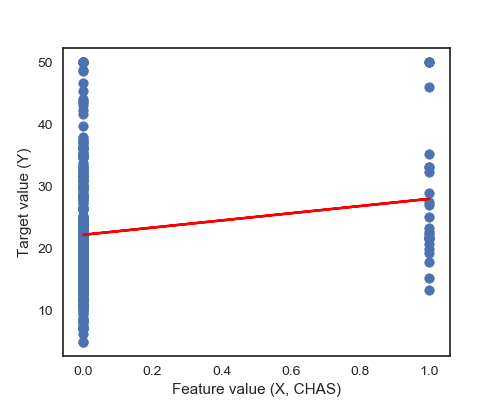

In [20]:
Y = dataset.target
X = dataset.data[:,[3]]
X_train, X_test, Y_train, Y_test= train_test_split(X, Y,random_state= 0)
lr = LinearRegression().fit(X_train,  Y_train)
estimated_linearmodel=	lr.intercept_ + lr.coef_ * X_train 
plt.figure(figsize=(5,4))
plt.scatter(X_train, Y_train, marker= 'o')
plt.plot(X_train, estimated_linearmodel, 'r-')
plt.xlabel('Feature value (X, CHAS)'); plt.ylabel('Target value (Y)')
plt.show()

<h3>Answer:   </h3> <br>
<b> 
- Plot LSTAT versus target variable (linear, or quadratic) 
- Plot RM versus target variable (linear)
- Plot CHAS versus target variable  (non linear) because it is Binary data 


=======================================================================================================================

<b>Problem #3-7.</b> Follow steps to answer questions.
> *Use train_test_split() with the option "random_state=0".

1. Fit a linear regression model with RM and LSTAT features only. Find the R-squared metric. 
2. Fit a linear regression model using RM, LSTAT and include the interaction term (RM * LSTAT). How R-squared metric differs from the previous model without interaction term?
3. Fit a linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$).  Find the R-squared metric.
4. Fit linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$ and $LSTAT^3$ ). Find the R-squared metric. 
- How does R-squared metric differ in the previous models ? <br> Comment your observation. 

**1.  Fit a linear regression model with RM and LSTAT features only**

In [21]:
# Data preprocessing

X_train,X_test,Y_train,Y_test=train_test_split(dataset.data,dataset.target,random_state=0)
pd_feature = pd.DataFrame(X_train, columns=dataset.feature_names)
pd_target = pd.DataFrame(Y_train, columns=['target'])
# Concatenate target and feature dataset
frames = [pd_feature, pd_target]
pd_dataset = pd.concat(frames, axis=1)

# using Statsmodels

modelsmf = smf.ols('target ~ RM+LSTAT', pd_dataset)
#modelsmf.fit().summary() #optional if you wanna see whole summary
print ("Statsmodels model result of R-squared metric with RM and LSTAT features only:\n",modelsmf.fit().rsquared)

#=========================================================================================================================
# using Sklearn model
df = (pd.DataFrame(dataset.data, columns= dataset.feature_names))
df['target'] = dataset.target
Y = df['target']
X = df[["RM", "LSTAT"]]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)
# Here we are creting dataset using only train data. 
frames = [X_train, Y_train]
pd_dataset = pd.concat(frames, axis=1)
modelLR = LinearRegression().fit(X_train,Y_train)
print("Sklearn model result of R-squared metric with RM and LSTAT features only:\n", modelLR.score(X_train, Y_train))

print ("Use Test: Sklearn model result of R-squared metric with RM and LSTAT features only:\n", modelLR.score(X_test, Y_test))

Statsmodels model result of R-squared metric with RM and LSTAT features only:
 0.659784656989
Sklearn model result of R-squared metric with RM and LSTAT features only:
 0.659784656989
Use Test: Sklearn model result of R-squared metric with RM and LSTAT features only:
 0.569244541584


**2 Fit a linear regression model using RM, LSTAT and include the interaction term (RM * LSTAT)**

In [25]:
# using Statsmodels
modelsmf = smf.ols('target ~ RM+LSTAT+LSTAT*RM', pd_dataset)
# modelsmf.fit().summary() #optional if you wanna see whole summary
print ("Statsmodels model result of R-squared metric with RM LSTAT and term (RM * LSTAT):\n",modelsmf.fit().rsquared)

#=========================================================================================================================
# using Sklearn model
# Data preprocessing
df = (pd.DataFrame(dataset.data, columns= dataset.feature_names))
df['target'] = dataset.target
Y = df['target']
df['RMLSTAT'] = (df['RM']*df['LSTAT'])
X = df[['RM', 'LSTAT','RMLSTAT']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)
modelLR2 = LinearRegression().fit(X_train,Y_train)
print("Sklearn model result of R-squared metric with RM and LSTAT term (RM * LSTAT):\n", modelLR2.score(X_train, Y_train))
print("Use Test: Sklearn model result of R-squared metric with RM and LSTAT features only:\n", modelLR2.score(X_test, Y_test))

Statsmodels model result of R-squared metric with RM LSTAT and term (RM * LSTAT):
 0.764646332468
Sklearn model result of R-squared metric with RM and LSTAT term (RM * LSTAT):
 0.764646332468
Use Test: Sklearn model result of R-squared metric with RM and LSTAT features only:
 0.661520770677


**3 Fit a linear regression model using LSTAT and include the polynomial term (  LSTAT^2 )**

In [26]:
# using Statsmodels
modelsmf = smf.ols('target ~ LSTAT+I(LSTAT**2)', pd_dataset)
# modelsmf.fit().summary() #optional if you wanna see whole summary
print ("Statsmodels model result of R-squared metric with LSTAT and polynomial term ( LSTAT^2):\n",modelsmf.fit().rsquared)
#=========================================================================================================================
# using Sklearn model
# Data preprocessing
df = (pd.DataFrame(dataset.data, columns= dataset.feature_names))
df['target'] = dataset.target
Y = df['target']
df['LSTATSQ']=(df['LSTAT']*df['LSTAT'])
X = df[['LSTAT','LSTATSQ']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)
modelLRSQ = LinearRegression().fit(X_train,Y_train)
print("Sklearn model result of R-squared metric with LSTAT and polynomial term ( LSTAT^2):\n", modelLRSQ.score(X_train, Y_train))
print("Use Test: Sklearn model result of R-squared metric with RM and LSTAT features only:\n", modelLRSQ.score(X_test, Y_test))

Statsmodels model result of R-squared metric with LSTAT and polynomial term ( LSTAT^2):
 0.668789207899
Sklearn model result of R-squared metric with LSTAT and polynomial term ( LSTAT^2):
 0.668789207899
Use Test: Sklearn model result of R-squared metric with RM and LSTAT features only:
 0.551875335414


**4. Fit linear regression model using LSTAT and include the polynomial term (  LSTAT^2  and  LSTAT^3)**

In [28]:
# using Statsmodels
modelsmf = smf.ols('target ~ LSTAT+I(LSTAT**2)+I(LSTAT**3)', pd_dataset)
# modelsmf.fit().summary() #optional if you wanna see whole summary
print ("Statsmodels model result of R-squared metric with LSTAT and polynomial term (LSTAT^2 and LSTAT^3):\n",modelsmf.fit().rsquared)
#=========================================================================================================================
# using Sklearn model
# Data preprocessing
df = (pd.DataFrame(dataset.data, columns= dataset.feature_names))
df['target'] = dataset.target
Y = df['target']
df['LSTATSQ']=(df['LSTAT']*df['LSTAT'])
df['LSTAT3']=(df['LSTAT']*df['LSTAT']*df['LSTAT'])
X = df[['LSTAT','LSTATSQ','LSTAT3']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)
modelLRSQ = LinearRegression().fit(X_train,Y_train)
print("Sklearn model result of R-squared metric with LSTAT and polynomial term (LSTAT^2 and LSTAT^3):\n", modelLRSQ.score(X_train, Y_train))
print("Use Test: Sklearn model result of R-squared metric with RM and LSTAT features only:\n", modelLRSQ.score(X_test, Y_test))

Statsmodels model result of R-squared metric with LSTAT and polynomial term (LSTAT^2 and LSTAT^3):
 0.68334070019
Sklearn model result of R-squared metric with LSTAT and polynomial term (LSTAT^2 and LSTAT^3):
 0.68334070019
Use Test: Sklearn model result of R-squared metric with RM and LSTAT features only:
 0.576883354518


=========================================================================================================================

<b>Problem #3-8.</b> Fit all features (13 features) in the dataset to a multiple linear regression model, and report<br> 

> (1) p-values for each feature. 

<b> Answer the following questions:</b> 

- What does p-value means
- What are the important features? <br> 


In [29]:
# Data preprocessing
pd_feature = pd.DataFrame(dataset.data, columns=dataset.feature_names)
pd_target = pd.DataFrame(dataset.target, columns=['target'])
# Concatenate target and feature dataset
frames = [pd_feature, pd_target]
pd_dataset = pd.concat(frames, axis=1)
full_model = smf.ols('target ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', pd_dataset)
full_model_result = full_model.fit()
print(full_model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 19 Feb 2018   Prob (F-statistic):          6.95e-135
Time:                        08:26:33   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.0

<h3>Answer:   </h3> <br>
<b> 
- A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis (The null hypothesis states that the slope is equal to zero which means there is not a significant linear relationship between the independent variable X and the dependent variable Y) So if p-value  ≤ 0.05 we can state that there are significant linear relationship.
- Most of the features look important (with low p-values). There are two insignificant features: INDUS and AGE.  

==========================================================================+============================================== <br> =========================================================================================================================

<h3>  Problem #4. Ordinary Least Square (OLS) [20 points] </h3> <br>

<b>Problem #4-1.</b>  Ordinary Least Square (OLS), calculate parameters

Follow two steps<br> 

- From your DataFrame generate new DataFrame with 2 columns ('LSTAT' and target)  

- Using the least squared formula below write a function to calulate $B_0$  and $B_1$  from your new DataFrame where 'LSTAT' = x and target = y. *(hint you can add 2 colums to your DataFrame($x*x$  and  $x*y$), check the problem #2-1)*

\begin{array} \\
    \hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}, \\ \\
    \hat{\beta}_1 = \frac{\sum_{i=1}^n y_i x_i - \bar{y}\sum_{i=1}^n x_i}{\sum_{i=1}^n x^2 - \bar{x}\sum_{i=1}^n x_i} \\ \\
    \text{where }\bar{x} = \frac{\sum_{i=1}^y x_i}{n} \text{ and } \bar{y} = \frac{\sum_{i=1}^y y_i}{n} \\
\end{array}

In [30]:
## answer code
# we need to create a DataFrame with data and column names. 
df = (pd.DataFrame(dataset.data, columns= dataset.feature_names))
# add target in the DataFrame
df['target'] = dataset.target
# Define new DataFrame with only 2 columns ('LSTAT', 'target) 
df2 =  df[['LSTAT', 'target']].astype(float) 
# Calculate X^2 and add it into your DataFrame as a new columns
df2['tarlstat']= df2['LSTAT'] * df2['target']
# Calculate X*Y and add it into your DataFrame as a new columns
df2['LSTATsquare'] = df2['LSTAT']* df2['LSTAT']
x_mean = df2['LSTAT'].sum()/df2['LSTAT'].count() # Calculate Mean of column LSTAT
y_mean = df2['target'].sum()/df2['target'].count()# Calculate Mean of the target feature 
# Calculate Sum of the columns 
x_sum = df2['LSTAT'].sum() 
xy_sum = df2['tarlstat'].sum()
xsq_sum = df2['LSTATsquare'].sum()
df2.drop('tarlstat', 1, inplace=True)
df2.drop('LSTATsquare', 1, inplace=True)
# From the equasion above Calculate b1 and b0 then print your result
b1 = ((xy_sum - (y_mean*x_sum))/(xsq_sum -(x_mean* x_sum)))
print ("b1 = ", b1)
b0 = y_mean - (b1*x_mean)
print ("b0 = ", b0)

b1 =  -0.950049353758
b0 =  34.5538408794


<b>Problem #4-2.</b>  Ordinary Least Square (OLS) <br>
Using formula below and using $B_0$ and $B_1$ from previous problem calculate $\hat{y}$ $where$ x = 'LSTAT'
- Add your predicted data to the DataFrame 


\begin{array} \\
    \hat{y} = \hat{\beta}_0 + \hat{\beta}_1*x, \\ \\
\end{array}

In [31]:
# answer code
# Here we are creating a column 'estimate' and computing Y using b0, b1, and X(LSTAT)
df2['estimate'] = (b0 + b1*df2['LSTAT']) 
df2.sample(10) # presenting the DataFrame.

,LSTAT,target,estimate
403,19.77,8.3,15.771365
234,8.05,29.0,26.905944
158,6.43,24.3,28.445024
122,17.93,20.5,17.519456
489,23.97,7.0,11.781158
453,16.74,17.8,18.650015
169,11.32,22.3,23.799282
13,8.26,20.4,26.706433
103,13.44,19.3,21.785178
419,22.74,8.4,12.949719


<b>Problem #4-3.</b>  Verification 

Predict $\hat{y}$ using linear regression model *(for this part you don't need to use train test split) *

- Add your predicted data to the DataFrame

Compare 3 column:
- target 
- predicted column using our own code, ( from problem 4-2)
- predicted column using linear regression model 

Comment your observations 



In [32]:
# answer code
# Here we are estimating Y using linear_model form sklearn library.
from sklearn import linear_model
X = df2['LSTAT']
Y = df2['target']
lr_model = linear_model.LinearRegression() # definig a model
X = X.reshape(-1, 1)
lr = lr_model.fit(X, Y) 
Y_est= lr_model.predict(X) # predicting Y (we created numpy array)
df2['estimateLR'] = Y_est # adding created array into a dataframe
df2.sample(10) # presenting the DataFrame. 

/Users/meir/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


,LSTAT,target,estimate,estimateLR
306,6.47,33.4,28.407022,28.407022
158,6.43,24.3,28.445024,28.445024
479,13.11,21.4,22.098694,22.098694
150,14.10,21.5,21.158145,21.158145
316,18.33,17.8,17.139436,17.139436
223,7.60,30.1,27.333466,27.333466
290,3.33,28.5,31.390177,31.390177
116,12.04,21.2,23.115247,23.115247
472,14.36,23.2,20.911132,20.911132
485,10.58,21.2,24.502319,24.502319


<b> Comment your observations
- Two approaches (predicted column using our own code, (problem 2-9) and predicted column using linear regression model) showed identical results. that is how we can verify results form our equation</b> 

### Submission
Once you complete the assignment, <br>
Name your file in the format of <b style='color:red'>LASTNAME-PITTID-Assignment1.ipynb</b>, and submit it on the courseweb